In [2]:
%matplotlib inline

from collections import defaultdict
import pandas as pd

def read_file(file):
    results_per_bot = defaultdict(lambda: defaultdict(lambda: 0))
    with open(file, 'r') as f:
        headers = f.readline().strip()
        line = "1"
        while line:
            line = f.readline().strip()
            entries = line.split(",")
            if len(entries) == 3:
                if entries[2] == 'X':
                    results_per_bot[entries[0]]['wins'] += 1
                    results_per_bot[entries[1]]['losses'] += 1
                elif entries[2] == 'O':
                    results_per_bot[entries[1]]['wins'] += 1
                    results_per_bot[entries[0]]['losses'] += 1
                elif entries[2] == 'draw':
                    results_per_bot[entries[0]]['draws'] += 1
                    results_per_bot[entries[1]]['draws'] += 1
                else:
                    raise RuntimeError("wtf")
    
    return results_per_bot
    
def print_table(file):
    results_per_bot = read_file(file)
    
    all_results = []
    for bot_number, results in results_per_bot.items():
        all_results.append([bot_number, results['wins'], results['draws'], results['losses']])
    sorted_results = sorted(all_results, key=lambda x: x[0])
    
    for result in sorted_results:
        print(",".join([str(res) for res in result]))

def df_up_to(max_round, which):
    data = []
    for x in range(max_round):
        results_per_bot = read_file('output/{}/{}/results_summary.csv'.format(x, which))
        for bot_number, results in results_per_bot.items():
            data.append([x, bot_number, results['wins'], results['draws'], results['losses']])
    return pd.DataFrame(data, columns=['round', 'bot_number', 'wins', 'draws', 'losses'])
        

In [89]:
round_up_to = 66
rolling = 15
data = df_up_to(round_up_to, 'round_robin')
mm_data = df_up_to(round_up_to, 'minimax')

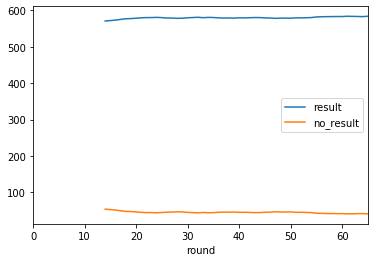

In [90]:
data['result'] = data['wins']
data['no_result'] = data['draws'] / 2
data.groupby('round')[['result', 'no_result']].sum().rolling(rolling).mean().plot()

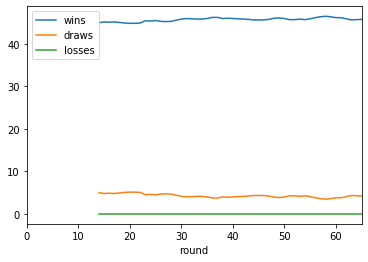

In [91]:
mm_data[mm_data['bot_number'] == 'Minimax Player'].groupby('round')[['wins', 'draws', 'losses']].sum().rolling(rolling).mean().plot()

In [64]:
data[data['round'] == (round_up_to - 1)].sort_values('wins', ascending=False)

,round,bot_number,wins,draws,losses,result,no_result
6962,278,ML Bot 12,29,3,18,29,1.5
6969,278,ML Bot 19,28,9,13,28,4.5
6966,278,ML Bot 16,27,5,18,27,2.5
6953,278,ML Bot 3,27,4,19,27,2.0
6950,278,ML Bot 0,25,7,18,25,3.5
6955,278,ML Bot 5,24,4,22,24,2.0
6967,278,ML Bot 17,23,14,13,23,7.0
6970,278,ML Bot 20,23,8,19,23,4.0
6968,278,ML Bot 18,21,13,16,21,6.5
6965,278,ML Bot 15,21,9,20,21,4.5


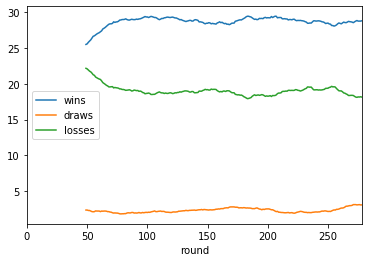

In [65]:
data[data['bot_number'] == "ML Bot 12"].set_index('round')[['wins', 'draws', 'losses']].rolling(rolling).mean().plot()

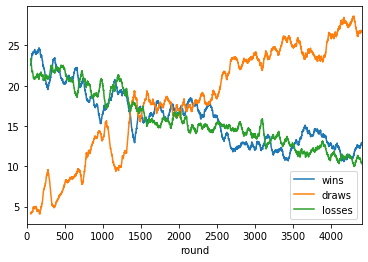

In [203]:
data[data['bot_number'] == "0"].set_index('round')[['wins', 'draws', 'losses']].rolling(rolling).mean().plot()

### Imran Special Relativity

In [11]:
import numpy as np
import pandas as pd

In [94]:
x_0 = 0.01
t_prime_0 = 1

def velocity_function(v_i):
    return ((x_0 + t_prime_0) * np.power(v_i, 4)) - (((2 * x_0) + t_prime_0) * np.power(v_i, 2)) + (x_0)

def full_solution(time_distance_ratio):
    return np.sqrt(1 / (1 + np.power(time_distance_ratio, 2)))

def full_solution_2(time_ratio):
    return np.sqrt(1 - np.power(time_ratio, 2))

In [50]:
v = np.linspace(-1.1, 1.1, 10000)
f_v = [velocity_function(v_i) for v_i in v]

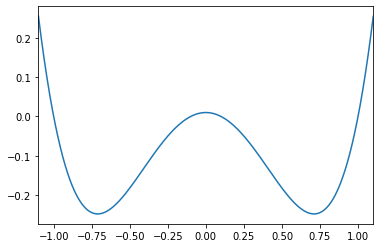

In [51]:
pd.Series(f_v, index=v).plot()

# Velocity as a function of distance / time reported ratio

This graph documents the answer to the question, what proportion of the speed of light is a spaceship travelling if you see it reach a star that is a distance x_0 light years away and the crew of the ship report that it took t_0 years to get there. x axis plotted a x_0 / t_0

Very much enjoy that the limits converage when the ratio is large (moving significantly slower than light speed)

In [87]:
ratio = np.linspace(0.5, 10, 10000)
f_ratio = [full_solution(ratio_i) for ratio_i in ratio]
g_ratio = 1 / ratio

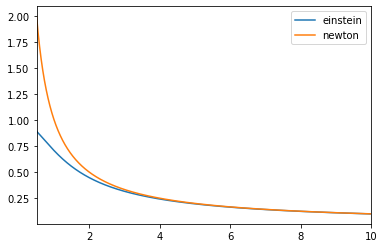

In [89]:
pd.DataFrame(np.array([f_ratio, g_ratio]).T, index=ratio, columns=['einstein', 'newton']).plot()

# Velocity as a function of time reported / time observed ratio

The graph documents the answer to the question, what propertion of the speed of light is a spaceship travelling if you see it reach a certain point in time t_0 and the crew of that ship report that it took time t_prime_0 to reach that point

Note that the classical limit here is as the x-axis tends to 1

In [108]:
ratio2 = np.linspace(0, 1, 10000)
f_ratio2 = [full_solution_2(ratio_i) for ratio_i in ratio2]

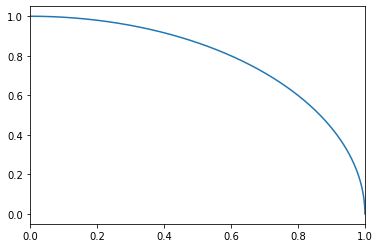

In [130]:
pd.Series(f_ratio2, index=ratio2).plot()

# Summation of frame velocities

This plot answers the following question:

We have three inertial frames: S, S' and S''. S' is moving at a speed v_1 relative to S and S'' is moving at a speed v_2 relative to S'. What speed is S'' moving at relative to S?

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [156]:
def f(x, y):
    return np.abs(((x + y) / (1 + (x*y))))

v_1 = np.linspace(-0.99999, 0.99999, 30)
v_2 = np.linspace(-0.99999, 0.99999, 30)

X, Y = np.meshgrid(v_1, v_2)
Z = f(X, Y)

In [159]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')